In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import tensorflow as tf
from tensorflow import keras

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
digit_mnist=keras.datasets.mnist

In [4]:
digit_mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\banty_ewxe1fw\\AppData\\Roaming\\Python\\Python39\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [7]:
digit_mnist=keras.datasets.mnist
(x_train_full,y_train_full),(x_test,y_test)=digit_mnist.load_data()

11490434/11490434 [==============================] - 32s 3us/step


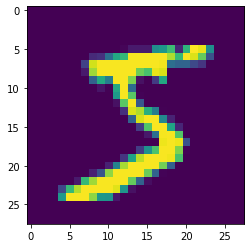

In [8]:
plt.imshow(x_train_full[0])

In [9]:
y_train_full[0]

5

In [10]:
class_names=["0","1","2","3","4","5","6","7","8","9"]

In [12]:
class_names[y_train_full[0]]

'5'

In [13]:
x_train_full[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [14]:
x_train_n=x_train_full/255.
x_test_n=x_test/255.

In [15]:
x_valid,x_train =x_train_n[:6000] , x_train_n[6000:]
y_valid,y_train =y_train_full[:6000] , y_train_full[6000:]
x_test = x_test_n

In [16]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


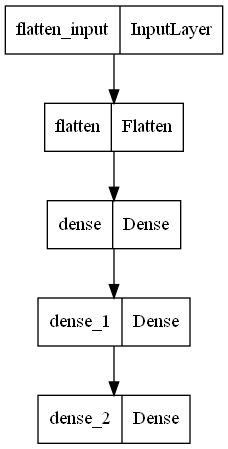

In [20]:
import pydot
keras.utils.plot_model(model)

In [21]:
weights,biases=model.layers[1].get_weights()

In [22]:
weights

array([[ 0.02570029, -0.00921319, -0.02297589, ...,  0.03759523,
         0.01990343, -0.00419658],
       [ 0.0493257 ,  0.07532704,  0.04591972, ...,  0.01272719,
         0.07017377,  0.06893378],
       [-0.00902112,  0.0490617 ,  0.01508749, ...,  0.00632862,
        -0.02900814, -0.04371899],
       ...,
       [ 0.06044598,  0.02830634,  0.04788385, ..., -0.02156743,
        -0.06206664, -0.06688078],
       [ 0.03822813,  0.07278952,  0.02177001, ..., -0.04696669,
        -0.04292265,  0.0316055 ],
       [-0.01534326, -0.03178874, -0.04308994, ...,  0.00643031,
         0.02572545, -0.03443564]], dtype=float32)

In [23]:
weights.shape

(784, 200)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [25]:
biases.shape

(200,)

In [26]:
model.compile(loss="sparse_categorical_crossentropy" ,
             optimizer="sgd",
             metrics=["accuracy"])

In [27]:
model_history=model.fit(x_train,y_train,epochs=60,
                       validation_data=(x_valid,y_valid))

Epoch 1/60
1688/1688 [==============================] - 11s 6ms/step - loss: 0.6607 - accuracy: 0.8267 - val_loss: 0.3216 - val_accuracy: 0.9125
Epoch 2/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3006 - accuracy: 0.9141 - val_loss: 0.2585 - val_accuracy: 0.9283
Epoch 3/60
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2488 - accuracy: 0.9293 - val_loss: 0.2254 - val_accuracy: 0.9385
Epoch 4/60
1688/1688 [==============================] - 15s 9ms/step - loss: 0.2151 - accuracy: 0.9390 - val_loss: 0.1961 - val_accuracy: 0.9442
Epoch 5/60
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1893 - accuracy: 0.9462 - val_loss: 0.1790 - val_accuracy: 0.9485
Epoch 6/60
1688/1688 [==============================] - 12s 7ms/step - loss: 0.1690 - accuracy: 0.9516 - val_loss: 0.1638 - val_accuracy: 0.9525
Epoch 7/60
1688/1688 [==============================] - 13s 8ms/step - loss: 0.1521 - accuracy: 0.9570 - val_loss: 0.1483 - val_accu

In [28]:
model_history.params

{'verbose': 1, 'epochs': 60, 'steps': 1688}

In [29]:
model_history.history

{'loss': [0.6606810092926025,
  0.30064913630485535,
  0.24879589676856995,
  0.21510885655879974,
  0.18928806483745575,
  0.16899922490119934,
  0.15212321281433105,
  0.13783954083919525,
  0.1260283887386322,
  0.11573788523674011,
  0.1066279262304306,
  0.09908407181501389,
  0.09169009327888489,
  0.08565644174814224,
  0.08013340085744858,
  0.07514198869466782,
  0.07064294070005417,
  0.06588234752416611,
  0.062411118298769,
  0.05872119963169098,
  0.05549013987183571,
  0.05245056748390198,
  0.04955599084496498,
  0.04679280146956444,
  0.04426787793636322,
  0.04201805219054222,
  0.0397978350520134,
  0.037791430950164795,
  0.035778675228357315,
  0.03384847193956375,
  0.03216734156012535,
  0.030367901548743248,
  0.028944173827767372,
  0.027387915179133415,
  0.025983018800616264,
  0.02462572418153286,
  0.0236499160528183,
  0.02230069786310196,
  0.021171364933252335,
  0.02018600143492222,
  0.019100278615951538,
  0.01824617013335228,
  0.017370201647281647,
 

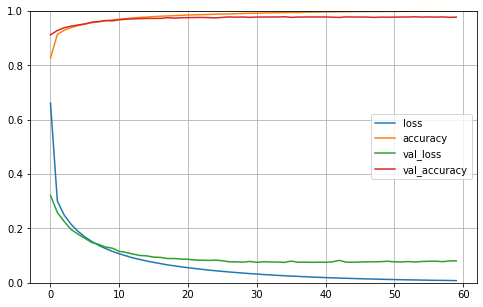

In [30]:
import pandas as pd 
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [31]:
model.evaluate(x_train,y_train)

1688/1688 [==============================] - 4s 2ms/step - loss: 0.0073 - accuracy: 0.9996


[0.007271654903888702, 0.9995740652084351]

In [32]:
x_new=x_test[:5]

In [33]:
y_proba=model.predict(x_new)
y_proba.round(2)

1/1 [==============================] - 0s 125ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
y_pred=np.argmax(model.predict(x_new),axis=1)
y_pred

1/1 [==============================] - 0s 35ms/step


array([7, 2, 1, 0, 4], dtype=int64)

In [35]:
np.array(class_names)[y_pred]

array(['7', '2', '1', '0', '4'], dtype='<U1')

AxesImage(54,36;334.8x217.44)


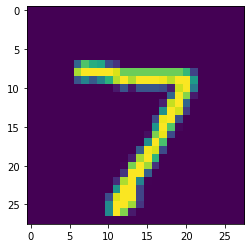

In [36]:
print(plt.imshow(x_test[0]))

AxesImage(54,36;334.8x217.44)


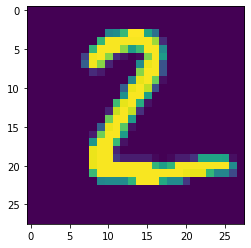

In [37]:
print(plt.imshow(x_test[1]))

AxesImage(54,36;334.8x217.44)


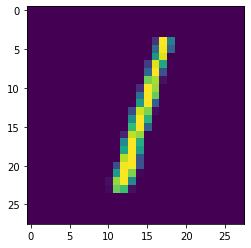

In [38]:
print(plt.imshow(x_test[2]))

AxesImage(54,36;334.8x217.44)


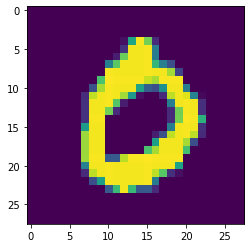

In [39]:
print(plt.imshow(x_test[3]))

AxesImage(54,36;334.8x217.44)


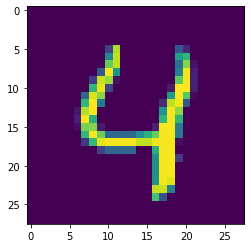

In [40]:
print(plt.imshow(x_test[4]))